# Module 6 - Strings and proteins

We have reached a stage where you have started doing things with python that would take too long to do by hand or by using excel. Today we will learn the final few functions to enable you to write code that can process large datasets. At the end of this module, you will be able to read a data file and plot the results, all within jupyter.

Today's topics:
 - Strings
 - Protein Handling

Adapted from: https://github.com/srinivasramachandran/Anschutz_python/tree/master

### Strings

In typical code where you read information from a file, you are going to read each line of a file as a string. So knowing python's powerful options for string manipulation will help you write code that reads files like human eyes.

Refreshing our memories, string is just a set of characters enclosed by quotation marks. We can manipulate strings in many ways with python that is powerful and very useful in a variety of contexts. 


### Let us do some string manipulation!

Let's some biological problems to illustrate string manipulation in python:

 - How do I calculate the percentage of positively charged residues in a protein sequence?
 - How do I get the reverse complement of a DNA sequence?
 - How do I calculate the GC% in my **raw** sequencing reads?
 
#### In the course of these examples, we will learn how to: <br>
 - Count the occurance of a substring
 - Length of a string
 - Split a string
 - Replace characters in a string
 - Find characters in a string
 - Remove specific characters from a stirng
 - Ask if the string has alphabets or numbers


### How do I calculate the percentage of positively charged residues in a protein sequence?

Below is the protein sequence for histone H3 in Fasta format. Let's write code to find percentage of positively charged residues. Protein/DNA sequence files usually are in Fasta format:<br>
"A sequence in FASTA format begins with a single-line description, followed by lines of sequence data. The description line (defline) is distinguished from the sequence data by a greater-than (">") symbol at the beginning." ([From NCBI](https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Web&PAGE_TYPE=BlastDocs&DOC_TYPE=BlastHelp))<br><br>
In reality, you would write code to load a fasta file but for now, we will just initialize a string as a shortcut:

In [1]:
fasta_file=">histone_H3\nMARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTE\
LLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA"
print(fasta_file)

>histone_H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA


### String parsing

String parsing can be a powerful way to process **large** or **many** files in batch mode to extract information relevant to us, avoiding manual curation. 

In the example of `fasta_file`, there are two lines:

- First line is the sequence name, which starts with ">"
- Second line is the sequence itself

How do we extract information from this fasta entry? We will use `string.split(separator)`. Here, `fasta_file` is the string, and `\n` is the separator (split by lines).


In [2]:
#Two lines in the fasta file, let us separate the lines
fasta_lines = fasta_file.split('\n')

Quick refresher: What kind of data type is `fasta_lines`?

In [3]:
type(fasta_lines)

list

In [4]:
print(fasta_lines)

['>histone_H3', 'MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA']


There were two lines, each of which are an element in the list `fasta_lines`. <br>Now, which of the elements is the header and which of them is the sequence? 
<br><br><br>
How do I separate the header and the sequence?<br><br>
It is always useful to write out or think out the pseudocode, so you can solve the problem in your head first, before writing any code.<br><br>
Pseudocode:
- The header in a fasta starts with `>`. We can check for that with `startswith()`. 
- We will go through each element of the list `fasta_lines` and check for the `>` sign. 
- If the `>` sign is absent, that element is the sequence.

In [5]:
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq)

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA


Ok, we have taught python to recognize the sequence now! Next find the percentage of positive residues in the sequence.

Lysine (K), Arginine (R), and Histidine (H) are the positive residues. We use `string.count(pattern)` to count occurences of these residues. Here, `seq` is the `string` and `H`, `K`, and `R` form the `pattern`.

In [6]:
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        #print the results inside the loop
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\nCount of Positive Residues:"+str(count))

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
Count of Positive Residues:33


Wait, this "count" doesn't take into account the protein length. We can't compare any two proteins on this metric. This brings us to the important concept of **normalization** which we will do a lot with any data we deal with to enable comparisons. How will you **normalize** the *positivity* of a protein??
<br><br><br>
We can **normalize** to total protein length. We use `len(string)` to find length of strings.

In [7]:
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        percent_positive = count*100/len(seq)
        #print the results inside the loop
        #Use round to limit number of decimals
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\n% of Positive Residues:"+str(round(percent_positive,4)))
        

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
% of Positive Residues:24.2647


Ok, so is 24 high or low or par for the course? We need to study more proteins! Let us add two "housekeeping" proteins: GAPDH and Actin, and an RNA binding protein, HuR. Again, we are using a shortcut for now and assigning the sequences to a `string`

In [8]:
#histone_H3, Actin, Gadph, HuR sequences
fasta_file=">histone_H3\nMARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLR\
FQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA\n>Actin\nMDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMG\
QKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDG\
VTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLG\
MESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF\n>\
Gapdh\nMGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFT\
TMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGA\
AKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRV\
VDLMAHMASKE\n>HuR\nMSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHSLGYGFVNYVTAKDAERAINTLNGLRLQSKTIK\
VSYARPSSEVIKDANLYISGLPRTMTQKDVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPITVKFAANPNQNKNVALLSQLYHSP\
ARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNASSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAMAIASLNGYRLGDKI\
LQVSFKTNKSHK"
print(fasta_file)

>histone_H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
>Actin
MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF
>Gapdh
MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE
>HuR
MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHSLGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQK

Here is the great thing about our code: If we were counting by hand, **we** have to do three times the work. But , we can use the exact same code that we wrote before - no extra effort!

In [9]:
#First create a list of lines
fasta_lines = fasta_file.split('\n')
#Now run the exact same loop!
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        percent_positive = count*100/len(seq)
        #print the results inside the loop
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\n% of Positive Residues:"+str(round(percent_positive,1)))

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
% of Positive Residues:24.3
Seq name:	>Actin
Seq:		MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF
% of Positive Residues:12.3
Seq name:	>Gapdh
Seq:		MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE
% of Positive Residue

### Replace
We don't want the `>` sign as part of the sequence name. How do we get rid of it? <br>

- `replace()` is like search & replace in text editing programs
- str.replace(character to be replaced, replacement, count)
- if count not specified, all instances replaced

In [10]:
seq_name2 = seq_name.replace(">", '')
print(seq_name2)

HuR


## Exercise 1
Write a script that mutates all the Cysteine (C) residues to Serine (S) for those 4 proteins and prints the new sequence

In [11]:
# add code here
fasta_lines = fasta_file.split('\n')
seq_CtoS = []


for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        for i in seq:
            seq_CtoS = seq.replace("C", 'S')
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq_CtoS)

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEASEAYLVGLFEDTNLSAIHAKRVTIMPKDIQLARRIRGERA
Seq name:	>Actin
Seq:		MDDDIAALVVDNGSGMSKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLSYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRSPEALFQPSFLGMESSGIHETTFNSIMKSDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKSF
Seq name:	>Gapdh
Seq:		MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASSTTNSLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTSRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE
Seq name:	>HuR
Seq:		MSNGYEDHMAEDSRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKV

### PDB as a protein source
The Potein Data Bank (PDB) is a common source for protein information and structures.
They have an API and below is a GPT built interface with that API. Try retreiving the Fasta
sequence for the four proteins given above using this tool.


In [12]:
import requests

def search_rcsb_by_protein_name(protein_name):
    """
    Search the RCSB PDB database for a protein by its name using the RCSB Search API.
    
    Parameters:
    protein_name (str): The name of the protein to search for (e.g., "hemoglobin").
    
    Returns:
    list: A list of PDB IDs that match the protein name.
    """
    # Base URL for the RCSB Search API
    search_url = "https://search.rcsb.org/rcsbsearch/v2/query"
    
    # Construct the search query using the `struct.title` attribute
    query_payload = {
        "query": {
            "type": "terminal",
            "service": "text",
            "parameters": {
                "attribute": "struct.title",
                "operator": "contains_phrase",
                "value": protein_name
            }
        },
        "return_type": "entry"
    }

    # Send the POST request to the Search API
    response = requests.post(search_url, json=query_payload)
    if response.status_code == 200:
        result = response.json()
        pdb_ids = [entry['identifier'] for entry in result.get("result_set", [])]
        return pdb_ids
    else:
        raise Exception(f"Search request failed with status code {response.status_code} and message: {response.text}")

def get_fasta_by_pdb_id(pdb_id):
    """
    Retrieve the FASTA sequence for a given PDB ID from the RCSB PDB database.
    
    Parameters:
    pdb_id (str): The PDB ID of the protein (e.g., "1A4U").
    
    Returns:
    str: The FASTA sequence in text format.
    """
    # URL to retrieve FASTA sequence
    fasta_url = f"https://www.rcsb.org/fasta/entry/{pdb_id}"
    
    # Get the FASTA sequence
    fasta_response = requests.get(fasta_url)
    if fasta_response.status_code == 200:
        return fasta_response.text
    else:
        raise Exception(f"Failed to retrieve FASTA for PDB ID: {pdb_id} with status code {fasta_response.status_code}")

def get_fasta_by_protein_name(protein_name):
    """
    Search for a protein by name in the RCSB PDB database and return its FASTA sequence.
    
    Parameters:
    protein_name (str): Name of the protein to search for (e.g., "hemoglobin").
    
    Returns:
    str: The FASTA sequence of the first match if found, else a message.
    """
    try:
        # Step 1: Search for the protein by name to get the PDB ID
        pdb_ids = search_rcsb_by_protein_name(protein_name)
        
        if not pdb_ids:
            return f"No entries found for protein name: {protein_name}"
        
        # Step 2: Retrieve the FASTA sequence for the first PDB ID found
        fasta_sequence = get_fasta_by_pdb_id(pdb_ids[0])
        return fasta_sequence
    except Exception as e:
        return str(e)

# Example usage
protein_name = "Histone H3"  # Change this to your desired protein name
fasta_sequence = get_fasta_by_protein_name(protein_name)
print(fasta_sequence)


>5VNB_1|Chains A, B, C, D|YEATS domain-containing protein 4|Homo sapiens (9606)
MFKRMAEFGPDSGGRVKGVTIVKPIVYGNVARYFGKKREEDGHTHQWTVYVKPYRNEDMSAYVKKIQFKLHESYGNPLRVVTKPPYEITETGWGEFEIIIKIFFIDPNERPVTLYHLLKLFQSDTNAMLGKKTVVSEFYDEMIFQDPT
>5VNB_2|Chain E[auth K]|H3K23acK27ac peptide|Homo sapiens (9606)
ATKAARKSAP



### Find motifs

So, HuR binds the motif `AUUUUUA`. How do we ask if an RNA sequence has this motif?

- `find()` method finds the first occurence of the specified value.
- `str.find(prefix,  start, end)`

In [13]:
seq = 'AUGCAUGCAGCUAGCUAAACCCGGGUUAUAUAGAAUUUUUAAAGUAGUAGGGCCGAGUAGAUUUUUAAGAGAGAUAUUUUUAGAGAGAUAGAUGAGAGG'
seq.find('AUUUUUA')

34

### An everyday example of string manipulation

How to find the reverse complement of a *DNA* sequence?

In [14]:
seq = "AUGCCAUGUUGTC"

If you have an *RNA* sequence, and want a DNA sequence:

In [15]:
if "U" in seq: 
    better_seq = seq.replace('U','T')

Now let us find the complement. We will take advantage of the fact that a string is iterable.

In [16]:
print(better_seq)

#First, let us define a list that will contain the complementary sequence
complement_seq=[]

#Iterate through the sequence (better_seq): this will go base by base
#and then add the complementary base to complement_seq

for i in range(0,len(better_seq)):
    if(better_seq[i] == 'A'):
        complement_seq.append('T')
    elif(better_seq[i] == 'T'):
        complement_seq.append('A')
    elif(better_seq[i] == 'G'):
        complement_seq.append('C')
    elif(better_seq[i] == 'C'):
        complement_seq.append('G')
    print("In the process\t",complement_seq)

print("\n\nHere is a sequence and its complement:\n")
print("5'\t",better_seq,"\t3'")
complement_better_seq = ''.join(complement_seq)
print("3'\t",complement_better_seq,"\t5'")

ATGCCATGTTGTC
In the process	 ['T']
In the process	 ['T', 'A']
In the process	 ['T', 'A', 'C']
In the process	 ['T', 'A', 'C', 'G']
In the process	 ['T', 'A', 'C', 'G', 'G']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A', 'C']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A', 'C', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A', 'C', 'A', 'G']


Here is a sequence and its complement:

5'	 ATGCCATGTTGTC 	3'
3'	 TACGGTACAACAG 	5'


In [17]:
print("Original Sequence\t\t\t5'\t",seq,"\t3'")
print("DNA Sequence\t\t\t5'\t",better_seq,"\t3'")
print("Complement\t\t5'\t",complement_better_seq,"\t3'\n\n")

#Now reverse complement:
rev_better_seq = complement_better_seq[::-1]
#rev_better_seq = "".join(list(reversed(complement_better_seq)))
print("DNA Sequence\t\t\t5'\t",better_seq,"\t3'")
print("Reverse Complement\t5'\t",rev_better_seq,"\t3'")


Original Sequence			5'	 AUGCCAUGUUGTC 	3'
DNA Sequence			5'	 ATGCCATGTTGTC 	3'
Complement		5'	 TACGGTACAACAG 	3'


DNA Sequence			5'	 ATGCCATGTTGTC 	3'
Reverse Complement	5'	 GACAACATGGCAT 	3'


### What kind of characters does my string have?
 - isalpha() - are all the characters alphabets?
 - isnumeric() - are all characters numeric?

In [18]:
seq = "ATGCATCGA"
seq.isalpha()

True

In [19]:
seq.isnumeric()

False

## Biopython
Some of the tasks we have been performing are so commonplace that packages are available to simplyfy
these processes. The Biopython package is one such tool. It does not including visualization but is
very helpful in manipulating proteins and genes. Start with installing the package in your environment.

In [20]:
# pip install biopython

In [21]:
import os
from Bio.PDB import PDBList, PDBParser

# Function to fetch and parse PDB files
def fetch_and_parse_pdb(pdb_id, save_dir='data'):
    # Create directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    pdb_list = PDBList()
    # Download the PDB file to the specified directory
    pdb_file_path = pdb_list.retrieve_pdb_file(pdb_id, pdir=save_dir, file_format='pdb')
    
    # Parse the PDB file
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure(pdb_id, pdb_file_path)
    
    # Extract sequence from the structure
    sequence = []
    for model in structure:
        for chain in model:
            # Iterate over residues and construct the sequence as a list of 3-letter codes
            sequence.extend([res.get_resname() for res in chain if res.get_id()[0] == ' '])  # Standard residues
    return sequence

# Function to compare sequences by residue
def compare_sequences(seq1, seq2):
    differences = []
    min_length = min(len(seq1), len(seq2))
    
    for i in range(min_length):
        if seq1[i] != seq2[i]:
            differences.append((i + 1, seq1[i], seq2[i]))  # +1 for human-readable index

    if len(seq1) != len(seq2):
        differences.append(("Length difference", len(seq1), len(seq2)))
    
    return differences

# Fetch sequences for 6BB5 and 1A3N
seq_6BB5 = fetch_and_parse_pdb("6BB5")
seq_1A3N = fetch_and_parse_pdb("1A3N")

# Convert sequences to comma-separated strings
seq_6BB5_str = ",".join(seq_6BB5)
seq_1A3N_str = ",".join(seq_1A3N)

# Get differences
diffs = compare_sequences(seq_6BB5, seq_1A3N)

# Print results
print("6BB5 Sequence:", seq_6BB5_str)
print("1A3N Sequence:", seq_1A3N_str)

if not diffs:
    print("The sequences are identical.")
else:
    print("Differences found:")
    for diff in diffs:
        print(diff)


ModuleNotFoundError: No module named 'Bio'

Biopython also has gene handling tools that can do the same complement creation we did manually before

In [22]:
from Bio.Seq import Seq
my_seq = Seq(seq)

print('seq is', seq)
print('my_seq is ', my_seq)

print('the type of seq is', type(seq))
print('the type of my_seq is', type(my_seq))

complement = my_seq.complement()
print(f'the complement to {my_seq} is ', complement)


seq is ATGCATCGA
my_seq is  ATGCATCGA
the type of seq is <class 'str'>
the type of my_seq is <class 'Bio.Seq.Seq'>
the complement to ATGCATCGA is  TACGTAGCT


## Exercise 2
Bio.Seq.Seq also has a tool to report the reverse complement of a strand called reverse_complement. Find the reverse complement of GACAACATGG

In [23]:
# code for exercise here
from Bio.Seq import Seq


dna_sequence = Seq("GACAACATGG")


reverse_complement = dna_sequence.reverse_complement()


print("Original sequence: ", dna_sequence)
print("Reverse complement: ", reverse_complement)

Original sequence:  GACAACATGG
Reverse complement:  CCATGTTGTC


## A real life problem

Sequencing reads from Illumina platform are stored as fastq files. Each sequencing "read" gets four lines. Here is an example:

`@SRR036139.1 11_26_8:5:1:749:1421 length=36
GCTGGCTGCGTCTGTGGTGGGTTTCATGTTAAGGTC
+SRR036139.1 11_26_8:5:1:749:1421 length=36
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII`

Description from FASTQ wiki page:
 - Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
 - Line 2 is the raw sequence letters.
 - Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
 - Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.
 
### We want to determine the GC content of the reads in any FASTQ file. 
GC content could tell you about any bias in the library or if you are sequencing a new species for example, it tells you the properties of the species' genome. So, if you have a fastq file, how would you determine the GC content of the reads?

- Somehow get the sequences from the file into a data structure you learned
- Examine the sequence to get GC content
- Present the data

#### To get GC content of the sequences in a fastq file:
 - Find the line with sequence : Count every 4th line starting from 2
 - Get the GC content : (number of G + number of C)/(total number of nucleotides) 

#### Before we begin, a couple of important points:

#### Toy Models are Important
When you write new code, don't apply it to actual data in the beginning - the data may be complicated enough for you to not be able to judge if your code is running properly. Instead, start with a toy model - something that will give you a trivial result. For example, here is a toy fastq file that has only two sequences with GC content of 100% and 50%:<br>
`@TEST1
GCGCGCGCGCGC
+TEST1
IIIIIIIIII
@TEST2
ATGCATGCATGC
+TEST2
IIIIIIIIIIII`

#### Also important to spell out the architecture of the data structures you will create

Some of the data structures we will use:

- `seqs` - a dictionary, where the key will be the sequence number, value will be the sequence
- `gc_content` - a dictionary, where the key will be the sequence number, value will be the GC content
- `fastq_file` - a file wrapper for reading the fastq file 

In [30]:
#How do we get check for 2, 6, 10, 14th lines??
#If we subtract 2 from them: 0, 4, 8, 12, ... should be divisible by 4. Let us check:
for i in range(1,20,1):
    print(i,(i-2)%4)

1 3
2 0
3 1
4 2
5 3
6 0
7 1
8 2
9 3
10 0
11 1
12 2
13 3
14 0
15 1
16 2
17 3
18 0
19 1


In [31]:
#Can we now pick the line numbers with the sequence?
for i in range(1,20,1):
    if ((i-2)%4 == 0):
        print(i,"is the sequence line")

2 is the sequence line
6 is the sequence line
10 is the sequence line
14 is the sequence line
18 is the sequence line


In [32]:
#Ok, line 2 is the sequence line for the 1st sequence, 6 for second sequence, and so forth.
#Can we assign this explicitly?
for i in range(2,20,4):
    read_num = int((i-2)/4)+1 # Convert the line_no to a sequence ID
    print("line",i,"contains the sequence for read #", read_num)

line 2 contains the sequence for read # 1
line 6 contains the sequence for read # 2
line 10 contains the sequence for read # 3
line 14 contains the sequence for read # 4
line 18 contains the sequence for read # 5


Okay, let us put all of this together

In [37]:
import os
seqs={} # A dictionary to store sequences if needed later

gc_content={} # A dictionary to store GC content if needed later

line_no = 0 # Variable to count lines

fastq_file = open(os.path.join('data','toy.fastq'), 'r' ) #Open the fastq file

for line in fastq_file: # Iterate through the fastq file
    line_no += 1 #counting line numbers
    # print(line_no)
    if (line_no-2)%4 == 0: # Does the line number belong to the series 2, 6, 10, 14, etc. ?
        read_num = int((line_no-2)/4)+1 # Convert the line_no to a sequence ID
        line=line.rstrip()
        seqs[read_num] = line #Populate seqs dictionary
        # print(seqs)
        gc = line.count('G') + line.count('C')
        gc = round(gc*100/len(line),2) #make it percentage, make it look pretty with round()
        gc_content[read_num] = gc
        print(read_num+1, line, gc) #print the results

2 GCGCGCGCGCGC 100.0
3 ATGCATGCATGC 50.0


Let us try the real data now. (First 250 sequences from the SRA file: SRR036139

In [40]:
seqs = {} # A dictionary to store sequences if needed later

gc_content = {} # A dictionary to store GC content if needed later

line_no = 0 # Variable to count lines

fastq_file = open(os.path.join('data', 'example.fastq'), 'r' ) #Open the fastq file

#Let us write sequence details in a file called "seq_details.txt"
fh = open(os.path.join('data','seq_details.txt'), "w+")

for line in fastq_file: # Iterate through the fastq file
    line_no+=1 #counting line numbers
    # print(line_no)
    if (line_no-2)%4 == 0: # Does the line number belong to the series 2, 6, 10, 14, etc. ?
        read_num = int((line_no-2)/4)+1 # Convert the line_no to a sequence ID
        line=line.rstrip()
        seqs[read_num] = line #Populate seqs dictionary
        gc = line.count('G') + line.count('C')
        gc_p=round(gc*100/len(line),2) #make it percentage, make it look pretty with round()
        gc_content[read_num] = gc_p
        #print the results to a string
        write_str = "Seq #"+ str(read_num) + " Seq: " + line + " Number of GC: " + str(gc) +" Sequence Length: "+ str(len(line)) \
        + " GC Content: " + str(gc_p) + "\n"
        #print the string to a file
        fh.write(write_str)
        # print(write_str)

fastq_file.close()


Check the "seq_details.txt" file - we just calculated the GC content of 250 sequences.

However, this is not really useful yet because there are 250 numbers and we don't have a sense of what the data is telling us. A histogram may be more useful. There is a direct histogram function we will discuss later, but here will do it from scratch. This is an example of how powerful coding can be - writing code to (insert your favorite analysis) from scratch!

### How to make a histogram? 

Wikipedia says: "To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size."

#### How to bin data?  

The idea is to put an interval of numbers into the midpoint like this:

1 2 3 4 5 6 7 8 9 10,11,12...

If we group these numbers by 4:

(1,2,3,4) (5,6,7,8) (9,10,11,12)

The midpoints are:

2.5, 6.5, 10.5

If we group the same numbers by 5:

(1,2,3,4,5) (6,7,8,9,10) (11,12,13,14,15)

The midpoints are:
3, 8, 13

#### How do we generalize this in our code? 
By combining `int()` and `round()`. I came up with the formula below by trial and error. I am sure you can come up with your own and even do better.

In [41]:
bin_size = 5
fact = (bin_size/2)-0.5
print("i bin")
for i in range(1, 21, 1):
    bin1 = int(round(((i-0.5)/bin_size + 0.5), 0))*bin_size - fact
    print(i, bin1)


i bin
1 3.0
2 3.0
3 3.0
4 3.0
5 3.0
6 8.0
7 8.0
8 8.0
9 8.0
10 8.0
11 13.0
12 13.0
13 13.0
14 13.0
15 13.0
16 18.0
17 18.0
18 18.0
19 18.0
20 18.0


Ok, we can assign a "bin" to any number. Now we need to count the numbers in each bin. We will put these counts in a dictionary called `hist`, where the keys are the bins and values are the counts.

In [42]:
hist = {}

bin_size = 5
fact = (bin_size/2)-0.5

for i in range(1, 21, 1):
    bin1 = int(round(((i-0.5)/bin_size + 0.5),0))*bin_size - fact
    #if the bin exists, add to it
    if bin1 in hist:
        hist[bin1] += 1
    #if bin doesn't exist, add to it
    else:
        hist[bin1] = 1

#let us now print the histogram
for i in sorted(hist):
    print(i, hist[i])

3.0 5
8.0 5
13.0 5
18.0 5


Ok, let us do the same with our `gc_content` dictionary. The keys of `gc_content` are sequence numbers and the values are the corresponding GC content in percentage

In [43]:
#let us assume bin size of 5 percent
bin_size = 2
fact = (bin_size/2)-0.5

#let us write the histogram into a file called "GC_hist.txt"
fh = open(os.path.join('data', 'GC_hist.txt'), "w")

hist = {} #declare the histogram

for i in gc_content:
    bin1 = int(round(((gc_content[i]-0.5)/bin_size + 0.5),0))*bin_size - fact
    if bin1 in hist:
        hist[bin1] += 1
    else:
        hist[bin1] = 1

for i in sorted(hist):
    hist[i]=hist[i]*100/len(gc_content)
    write_str =str(i) + " " + str(hist[i]) + "\n"
    fh.write(write_str)

fh.close()


Would be nice if we could see a plot. 

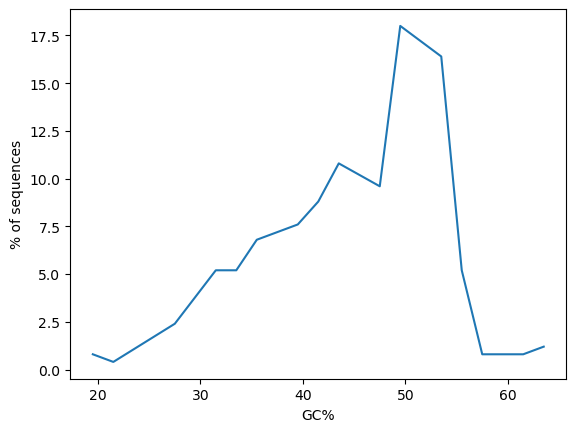

In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

yt = []

x = np.asarray(sorted(hist))
for i in sorted(hist):
    yt.append(hist[i])
y = np.asarray(yt)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='GC%', ylabel='% of sequences')

plt.show()

fig.savefig(os.path.join('data', 'histogram.png'))

##  Exercise 3: 
Ask GPT to make a function that turns a protein sequence (specifically, HuR from earlier) into a gene
sequence using thebiopython tools: CodonTable and Seq. Then manually integrate that output with your
gc_content script to determine the gc content of HuR.
One approach would be to give GPT your gc content code and ask it to functionalize it. That should make 
integrating the two easier.

GPT attempt 1:

In [47]:
from Bio.Seq import Seq
from Bio.Data import CodonTable
import random

def protein_to_gene(protein_sequence):
    # Get the standard codon table
    codon_table = CodonTable.unambiguous_dna_by_id[1]
    
    # Initialize an empty list for the codon sequence
    codon_sequence = []
    
    # Iterate over each amino acid in the protein sequence
    for amino_acid in protein_sequence:
        # Get a list of possible codons for the amino acid
        possible_codons = codon_table.back_table(amino_acid)
        
        # Randomly choose one codon from the list (or you could choose the first one)
        selected_codon = random.choice(possible_codons)
        
        # Append the selected codon to the codon sequence
        codon_sequence.append(selected_codon)
    
    # Join the codons to form a gene sequence (DNA sequence)
    gene_sequence = ''.join(codon_sequence)
    
    return gene_sequence

# Example usage:
protein_sequence = "MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYD"
gene_sequence = protein_to_gene(protein_sequence)
print("Gene Sequence (DNA):", gene_sequence)


TypeError: 'dict' object is not callable

GPT attempt 2:

In [51]:
from Bio.Seq import Seq
from Bio.Data import CodonTable
import random

def protein_to_gene(protein_sequence):
    # Get the standard codon table
    codon_table = CodonTable.unambiguous_dna_by_id[1]

    # Initialize an empty list for the codon sequence
    codon_sequence = []
    
    # Iterate over each amino acid in the protein sequence
    for amino_acid in protein_sequence:
        print('amino_acid', amino_acid)
        # Get a list of possible codons for the amino acid
        possible_codons = codon_table.forward_table.get(amino_acid)
        print(possible_codons)
        # If there are possible codons, choose one (if not, handle accordingly)
        if possible_codons:
            # Randomly choose one codon from the list (or you could choose the first one)
            selected_codon = random.choice(list(codon_table.back_table[amino_acid]))
            # Append the selected codon to the codon sequence
            codon_sequence.append(selected_codon)
        else:
            raise ValueError(f"No codon found for amino acid: {amino_acid}")
    
    # Join the codons to form a gene sequence (DNA sequence)
    gene_sequence = ''.join(codon_sequence)
    
    return gene_sequence

# Example usage:
protein_sequence = "MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYD"
gene_sequence = protein_to_gene(protein_sequence)
print("Gene Sequence (DNA):", gene_sequence)


amino_acid M
None


ValueError: No codon found for amino acid: M

GPT attempt 3:

In [52]:
from Bio.Data import CodonTable
import random

def protein_to_gene(protein_sequence):
    # Get the standard codon table
    codon_table = CodonTable.unambiguous_dna_by_id[1]
    
    # Create a dictionary to map amino acids to their possible codons
    amino_acid_to_codons = {}
    for codon, amino_acid in codon_table.forward_table.items():
        if amino_acid not in amino_acid_to_codons:
            amino_acid_to_codons[amino_acid] = []
        amino_acid_to_codons[amino_acid].append(codon)

    # Initialize an empty list for the codon sequence
    codon_sequence = []
    
    # Iterate over each amino acid in the protein sequence
    for amino_acid in protein_sequence:
        # Get a list of possible codons for the amino acid
        possible_codons = amino_acid_to_codons.get(amino_acid)
        
        # If there are possible codons, choose one
        if possible_codons:
            selected_codon = random.choice(possible_codons)
            # Append the selected codon to the codon sequence
            codon_sequence.append(selected_codon)
        else:
            raise ValueError(f"No codon found for amino acid: {amino_acid}")
    
    # Join the codons to form a gene sequence (DNA sequence)
    gene_sequence = ''.join(codon_sequence)
    
    return gene_sequence

# Example usage:
protein_sequence = "MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYD"
gene_sequence = protein_to_gene(protein_sequence)
print("Gene Sequence (DNA):", gene_sequence)


Gene Sequence (DNA): ATGACAGAATACAAACTTGTTGTCGTAGGAGCAGGTGGCGTTGGTAAGAGCGCATTGACTATCCAACTTATTCAAAATCACTTCGTTGATGAGTACGAT


##  Exercise 4 (optional)
Use GPT to create an API interace with the EMBL EBI Proteins API to download their sequence for Actin and find the longest overlapping sequence with the one provided above. The accession number for actin is A0A015J624 and the base url is:
https://www.ebi.ac.uk/proteins/api/proteins


GPT attempt 1:

In [53]:
import requests
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# EMBL-EBI Proteins API base URL
BASE_URL = "https://www.ebi.ac.uk/proteins/api/proteins/"

# Function to fetch protein sequence using UniProt ID
def fetch_protein_sequence(uniprot_id):
    url = f"{BASE_URL}{uniprot_id}"
    response = requests.get(url, headers={"Accept": "application/json"})
    if response.status_code == 200:
        data = response.json()
        sequence = data['sequence']['sequence']
        return sequence
    else:
        raise Exception(f"Failed to fetch sequence for UniProt ID {uniprot_id}: {response.status_code}")

# Provided Actin target sequence
target_sequence = (
    "MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF"
)

# Fetch Actin sequence from the EMBL-EBI Proteins API using the UniProt ID for human Actin
# UniProt ID for human Actin is 'P60709'
uniprot_id = 'P60709'
actin_sequence = fetch_protein_sequence(uniprot_id)

# Function to find the longest overlapping sequence between two sequences
def find_longest_overlap(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2)
    longest_alignment = max(alignments, key=lambda x: x[2])  # Choose alignment with the highest score
    aligned_seq1, aligned_seq2, score, start, end = longest_alignment
    return aligned_seq1[start:end]

# Finding the longest overlapping sequence between the fetched Actin sequence and the provided sequence
longest_overlap = find_longest_overlap(actin_sequence, target_sequence)

# Display the results
print(f"Actin Sequence (First 50 amino acids): {actin_sequence[:50]}...")
print(f"Target Sequence (First 50 amino acids): {target_sequence[:50]}...")
print(f"Longest Overlapping Sequence: {longest_overlap}")


/opt/anaconda3/envs/molecular_informatics/lib/python3.11/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Actin Sequence (First 50 amino acids): MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQK...
Target Sequence (First 50 amino acids): MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQK...
Longest Overlapping Sequence: MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF


GC content of HuR gene: 65.24%
